In [80]:
import pymysql
import pandas as pd
%matplotlib inline

In [46]:
connection = pymysql.connect(
    host="server.cory.sh",
    user="root",
    password="",
    db="imdb",
    cursorclass=pymysql.cursors.DictCursor
)

In [47]:
cursor = connection.cursor()

In [48]:
sql = """
SELECT AVG(averageRating) as rating, debutYear as year FROM Title
	WHERE 
		averageRating IS NOT NULL
		AND
        debutYear IS NOT NULL
	GROUP BY debutYear
"""
cursor.execute(sql)

135

In [49]:
items = cursor.fetchall()

In [52]:
results = {}
for item in items:
    results[item['year']] = item['rating']

In [87]:
s = pd.Series(results)

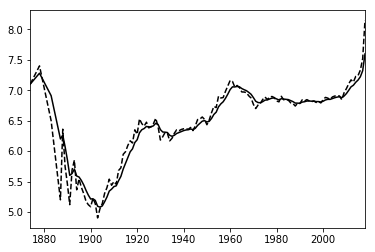

In [88]:
s.plot(style='k--')
s.ewm(span=5).mean().plot(style='k', 